## Biomedical Data Science & AI

## Assignment 2

#### Group members:  Fabrice Beaumont, Fatemeh Salehi, Genivika Mann, Helia Salimi, Jonah

#### **Exercise 1 - Understanding Your Dataset**
**Load the processedClevelandData.csv dataset. The features for the dataset are
described in the featureDescription.csv file.**

In [16]:
import pandas as pd

In [17]:
# load dataset in dataframe
cleveland_dataset = pd.read_csv( "processedClevelandData.csv", sep = ";" )
nr_rows, nr_cols = cleveland_dataset.shape
print( f"The dataset contains {nr_rows} rows and {nr_cols} columns." )
print( cleveland_dataset.head(5) )

The dataset contains 303 rows and 16 columns.
   Unnamed: 0  Unnamed: 0.1  id   Age  Sex   cp  trestbps         chol  fbs  \
0           0             0   1  63.0  1.0  1.0     145.0  233.0 mg/dl  1.0   
1           1             1   2  67.0  1.0  4.0     160.0  286.0 mg/dl  0.0   
2           2             2   3  67.0  1.0  4.0     120.0  229.0 mg/dl  0.0   
3           3             3   4  37.0  1.0  3.0     130.0  250.0 mg/dl  0.0   
4           4             4   5  41.0  0.0  2.0     130.0  204.0 mg/dl  0.0   

   resetecg  thalach  exang  slope   ca thal  num  
0       2.0    150.0    0.0    3.0  0.0  6.0    0  
1       2.0    108.0    1.0    2.0  3.0  3.0    2  
2       2.0    129.0    1.0    2.0  2.0  7.0    1  
3       0.0    187.0    0.0    3.0  0.0  3.0    0  
4       2.0    172.0    0.0    1.0  0.0  3.0    0  


In [18]:
# load feature description in data frame
feature_description = pd.read_csv( "featureDescription.csv", sep = ";" )
nr_rows, nr_cols = feature_description.shape
print( f"The dataset contains {nr_rows} rows and {nr_cols} columns." )

print( feature_description )
# feature_description.style

The dataset contains 27 rows and 2 columns.
                                             features  \
0                                                  id   
1                                                 Age   
2                   Sex;"sex (1 = male; 0 = female) "   
3                                cp;"chest pain type    
4                         -- Value 1: typical angina    
5                        -- Value 2: atypical angina    
6                       -- Value 3: non-anginal pain    
7                          -- Value 4: asymptomatic "   
8                                            trestbps   
9                                                chol   
10  fbs;"(fasting blood sugar > 120 mg/dl) (1 = tr...   
11   resetecg;" resting electrocardiographic results    
12                                -- Value 0: normal    
13  -- Value 1: having ST-T wave abnormality (T wa...   
14  -- Value 2: showing probable or definite left ...   
15                                          

**1. Perform data cleaning procedures such that your final dataset is usable in the
following questions.**

1. Check unique values in each column, to remove any column without any unique value

In [19]:
print( 'No. of unique values in each column')
print( cleveland_dataset.nunique() )

No. of unique values in each column
Unnamed: 0      303
Unnamed: 0.1    303
id              303
Age              41
Sex               2
cp                4
trestbps         50
chol            152
fbs               2
resetecg          3
thalach          91
exang             2
slope             3
ca                5
thal              4
num               5
dtype: int64


2. Check and remove duplicate rows in dataset

In [20]:
import numpy as np
# count no. of duplicate rows
nr_duplicated_rows = np.sum( cleveland_dataset.duplicated() )
print( f"There are {nr_duplicated_rows} duplicated rows." ) 

There are 0 duplicated rows.


3. Check and remove missing values in dataset

In [21]:
# count no. of missing values in the dataset
nr_missing_values = cleveland_dataset.isna().sum().sum()
print(f"There are {nr_missing_values} values missing (or NaN) in all columns and rows.")

There are 0 values missing (or NaN) in all columns and rows.


4. Change index of dataset to the 'id' column

In [22]:
# Check whether `id` column uniquely identifies each row
cleveland_dataset[ 'id' ].is_unique 

True

In [8]:
# Change index of dataset to `id` column
cleveland_dataset.set_index( 'id', inplace = True )
print( cleveland_dataset )

     Unnamed: 0  Unnamed: 0.1   Age  Sex   cp  trestbps         chol  fbs  \
id                                                                          
1             0             0  63.0  1.0  1.0     145.0  233.0 mg/dl  1.0   
2             1             1  67.0  1.0  4.0     160.0  286.0 mg/dl  0.0   
3             2             2  67.0  1.0  4.0     120.0  229.0 mg/dl  0.0   
4             3             3  37.0  1.0  3.0     130.0  250.0 mg/dl  0.0   
5             4             4  41.0  0.0  2.0     130.0  204.0 mg/dl  0.0   
6             5             5  56.0  1.0  2.0     120.0  236.0 mg/dl  0.0   
7             6             6  62.0  0.0  4.0     140.0  268.0 mg/dl  0.0   
8             7             7  57.0  0.0  4.0     120.0  354.0 mg/dl  0.0   
9             8             8  63.0  1.0  4.0     130.0  254.0 mg/dl  0.0   
10            9             9  53.0  1.0  4.0     140.0  203.0 mg/dl  1.0   
11           10            10  57.0  1.0  4.0     140.0  192.0 mg/dl  0.0   

5. Check for inconsistent data

In [9]:
# list datatype of the data present in each column
cleveland_dataset.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
Age             float64
Sex             float64
cp              float64
trestbps        float64
chol             object
fbs             float64
resetecg        float64
thalach         float64
exang           float64
slope           float64
ca               object
thal             object
num               int64
dtype: object

In [10]:
# examine values present in `ca` column and `thal` column
print( 'Value counts of `ca` column ' )
print( cleveland_dataset[ 'ca' ].value_counts() )
print( 'Value counts of `thal` column ' )
print( cleveland_dataset[ 'thal' ].value_counts() )

Value counts of `ca` column 
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
Value counts of `thal` column 
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


The value `?` is present in column `ca` and `thal`. We drop all rows containing `?` value for these columns.

In [11]:
cleveland_dataset = cleveland_dataset[ ( cleveland_dataset[ "ca" ] != "?" ) ]
cleveland_dataset = cleveland_dataset[ ( cleveland_dataset[ "thal" ] != "?" ) ]

In [12]:
# `?` removed in `ca` column
print( cleveland_dataset[ 'ca' ].value_counts() )

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


In [13]:
# `?` removed in `thal` column
print( cleveland_dataset[ 'thal' ].value_counts() )

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


**2. For each type of diagnosis of heart disease, find the following for the resting blood pressure: Mean, Median, Standard Deviation**

In [14]:
def findDescriptiveStats( feature_values ):
    ''' This method prints the mean, median and standard deviation
    of a feature
    Args:
        feature_values: A series containing values of
        a feature of dataset
    '''
    print( 'Mean', feature_values.mean() )
    print( 'Median', feature_values.median() )
    print( 'Standard Deviation', feature_values.std() )
    
    
    
'''
For each type of heart diagnosis in 'num' column, do the following:-
1. filter the rows for that diagnosis
2. call findDescriptiveStats() to compute mean, median and standard deviation of 'trestbps' over filtered rows
'''
for diagnosis_value in cleveland_dataset[ 'num' ].unique():
    print( "Diagnosis Value ", diagnosis_value )
    filtered_dataset = cleveland_dataset[ cleveland_dataset[ 'num'] == diagnosis_value ]
    findDescriptiveStats( filtered_dataset[ 'trestbps' ] )
    print( "\n" )


Diagnosis Value  0
Mean 129.175
Median 130.0
Standard Deviation 16.37398995876728


Diagnosis Value  2
Mean 134.37142857142857
Median 134.0
Standard Deviation 18.125519407220104


Diagnosis Value  1
Mean 133.27777777777777
Median 130.0
Standard Deviation 18.196429949115892


Diagnosis Value  3
Mean 135.45714285714286
Median 130.0
Standard Deviation 21.660947316667897


Diagnosis Value  4
Mean 138.76923076923077
Median 145.0
Standard Deviation 17.18601100776368




**3. Use Spearman's and Kendall correlation to quantify the correlation between
age and the following.
a. Resting blood pressure
b. Serum cholesterol level
c. Maximum heart rate achieved
Also, which variable(s) are most correlated with age? Illustrate with heatmaps.**

In [23]:
selected_features = [ 'trestbps', 'chol', 'thalach' ]

# calculating coefficients for selected_features
for ( feature_name, index ) in enumerate( selected_features ):
    print( 'Correlation between', 'Age &', feature_name )
    print( 'Spearman Correlation Coeffiecient:\t', cleveland_dataset.corr(method = 'spearman' )[ 'Age' ][ feature_name ] )
    print( 'Kendall Correlation Coeffiecient:\t', cleveland_dataset.corr(method = 'kendall' )[ 'Age' ][ feature_name ] )
    print( '\n' )
    

Correlation between Age & 0
Spearman Correlation Coeffiecient:	 -0.0013312553045430916


OverflowError: int too large to convert to float

The `Age` and `thalach` ( maximum heart rate achieved ) have highest negative correlation, while the `Age` and `trestbps` ( resting blood pressure ) have the highest positive correlation value. This is confirmed with the heatmap below:

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# slicing Spearman Correlation data frame & Kendall Correlation data frame to only keep rows/columns of interest
Spearman_Corr = cleveland_dataset.corr(method = 'spearman' )
Spearman_Corr = Spearman_Corr.loc[ [ 'Age' ],[ 'trestbps', 'chol', 'thalach' ] ]
print( Spearman_Corr )
Kendall_Corr = cleveland_dataset.corr(method = 'kendall' )
Kendall_Corr = Kendall_Corr.loc[ [ 'Age' ],[ 'trestbps', 'chol', 'thalach' ] ]


# plot the heatmap and annotation on it for Spearman Correlation 
sns.heatmap( Spearman_Corr, yticklabels = [ 'Age' ], xticklabels = [ 'trestbps', 'chol', 'thalach' ], annot = True)
plt.title('Spearman Correlation Heat Map')
plt.show()

# plot the heatmap and annotation on it for Kendall Correlation
sns.heatmap( Kendall_Corr, yticklabels = [ 'Age' ], xticklabels =  [ 'trestbps', 'chol', 'thalach' ], annot = True)
plt.title('Kendall Correlation Heat Map')
plt.show()

     trestbps  chol   thalach
Age  0.292183   NaN -0.391633


/home/fabrice/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


OverflowError: int too large to convert to float

**4.From your understanding, which of the features can be labeled as discrete
random variables and which features as continuous random variables?**

- Categorical features can be labelled as Discrete Random Variables. Hence the below features are Discrete Random Variables:
Sex,        
cp,              
fbs,         
resetecg,   
exang,    
slope,     
thal,        
num          

- Non-Categorical/Continuous features can be labelled as Continuous Random Variables.The below features are Continuous Random Variables:
Age,
trestbps,
chol,
thalach,
ca

**5.Describe the distribution for the values of the "thalach" feature? Illustrate with a plot.**

The `Thalach` feature follows a normal distribution with its mean lying around 160-170, which is illustrated by the density plot below:

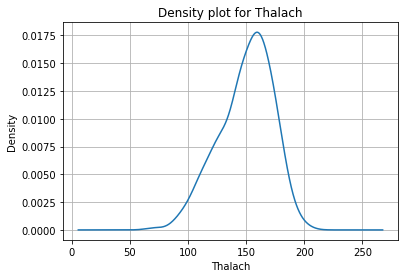

In [25]:
cleveland_dataset[ 'thalach' ].plot.density(grid=True)
plt.title( 'Density plot for Thalach' )
plt.xlabel( 'Thalach' )
plt.show()

**6. Plot the frequency of “Sex” variable in the dataset and describe what you
observe in the plot. Similarly plot and describe the 'ca' feature for the male
participants.**

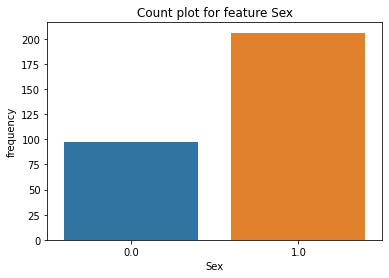

In [26]:
# Plotting count plot for "Sex" feature in dataset
sns.countplot( data = cleveland_dataset, x = "Sex" )
plt.title( 'Count plot for feature Sex' )
plt.xlabel( 'Sex' )
plt.ylabel( 'frequency' )
plt.show()

Observation: The number of male participants are more than twice the number of female participants in the dataset.

['0.0' '3.0' '2.0' '1.0' '?']


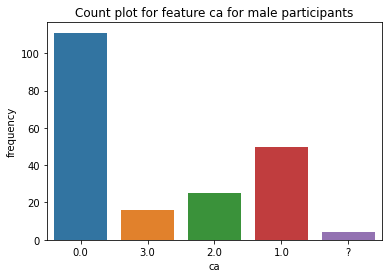

In [27]:
# Plotting the "ca" feature for male participants

# preparing dataframe with only male participant rows
male_participants_dataset = cleveland_dataset[ cleveland_dataset[ 'Sex' ] == 1 ]
print( male_participants_dataset[ "ca" ].unique() )


# plotting 'ca' for male participants
sns.countplot( data = male_participants_dataset, x = "ca" )
plt.title( "Count plot for feature ca for male participants" )
plt.xlabel( "ca" )
plt.ylabel( "frequency" )
plt.show()

Observation: More than half of the male participants have 'ca' feature value of '0.0', followed by almost a quarter male participants having 'ca' equal to '1.0'. Less than 20 male participants have 'ca' feature of '3.0' 

**7.Detect outlier patients for features "trestbps'' and "chol". Illustrate with plots.**

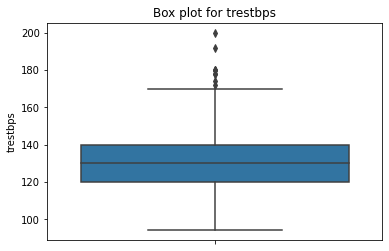

In [28]:
# plotting violin plot to detect outliers

# Box plot for trestbps
sns.boxplot( y = cleveland_dataset[ 'trestbps' ] )
plt.title( 'Box plot for trestbps' )
plt.show()

In [29]:
# Box plot for chol
sns.boxplot( y = cleveland_dataset[ 'chol' ] )
plt.title( 'Box plot for chol' )
plt.show()

TypeError: Vertical orientation requires numeric `y` variable.

Outliers are visible in box plots as the points below Minimum ( $Q_1-1.5*IQR$ ) or the points above Maximum ( $Q_3+1.5*IQR$). The box plots for 'trestbps' and 'chol' shows outliers above the maximum.

In [ ]:
def outlierDetector( dataset, feature ):
    '''This method calculates quartiles, IQR and minimum, maximum for a feature of the dataset.
    It then returns a dataframe containing outliers of the feature
    
    Args:
        dataset - A dataset containing the feature whose outliers need to be detected.
        feature - The feature whose outliers need to be detected
        
    Return:
        outliers - A dataframe containing outliers of df
    '''
    q1 = dataset[ feature ].quantile(0.25)
    q3 = dataset[ feature ].quantile(0.75)
    iqr = q3 - q1
    minimum = q1 - 1.5 * iqr
    maximum = q3 + 1.5 * iqr
    outliers = dataset[ ( dataset[ feature ] > maximum ) | ( dataset[ feature ] < minimum ) ]
    outlier_rows = outliers.shape[ 0 ]
    print( f"The no. of outliers in feature {feature} are {outlier_rows}" )
    print( outliers, "\n" )
    
outlierDetector( cleveland_dataset, 'trestbps' )
outlierDetector( cleveland_dataset, 'chol' )

#### **Exercise 2 - Probability**

**1. Suppose a discrete random variable, MMSE (Mini mental state examination),
cognitive test measured for Alzheimer’s disease (AD) has the following
probability mass function.....Find the probability that MMSE:
a) at least 22
b) at least 14 and at most 28**

 $$
a) Pr(X >= 22) = 1 - Pr(X<22) = 1-[ Pr(X=5) + Pr(X=8) + Pr(X=14) ] \\ = 1- [ 0.05 + 0.27 + 0.16 ] = 0.52
 $$

$$
b) Pr(X>=14 \ and \ X<=28) = Pr(X=14)+Pr(X=22)+Pr(X=24)+Pr(X=28) \\ = 0.16+0.17+0.03+0.12 = 0.48
 $$

**2. A company produced antibody testing kits for COVID-19. The false positive
rate of the test is known to be 3%. What is the probability to find at least 2
false positive results within 35 tested patients?**

Let 
- X be the nr. of false positive results,
- n be the nr. of tested patients (n=35),
- p be the probability of a single false postive result (p= 3/100) and
- q = (1-p) = 97/100

$$
Pr\Big( X>=2 \ | \ n=35, p= \frac{3}{100}\Big) = 1-Pr\Big(X<2 \ | \ n=35, p=\frac{3}{100}\Big)
\\ = 1 - [ Pr(X=0) + Pr(X=1) ]
$$


We can calculate $Pr(X=0) \ and \ Pr(X=1) $ using Binomial Distribution
$$
Pr\Big(X<2 \ | \ n=35, p=\frac{3}{100}\Big) = Pr\Big(X<2 \ | \ n=35, p=\frac{3}{100}\Big)
$$

Probability of 0 false positives with n=35
$$
Pr\Big(X=0, n=35, p=\frac{3}{100}\Big) =  \binom{35}{0} \left(\frac{3}{100}\right)^{0}\left(\frac{97}{100}\right)^{35} = 0.3443 \tag1
$$
Probability of 1 false positive with n=35
$$
Pr\Big(X=1, n=35, p=\frac{3}{100}\Big) =  \binom{35}{0} \left(\frac{3}{100}\right)^{1}\left(\frac{97}{100}\right)^{34} = 0.01065 \tag2
$$
Using $(1)$ and $(2)$,
$$
Pr\Big(X>=2 \ | \ n=35, p=\frac{3}{100}\Big) = 1-\left(0.3443+0.01065 \right) = 0.64505 
$$

#### **Exercise 3 - Hypothesis Testing**

Using the processed dataset from question 1 answer the following questions.

**1. Are all the criteria for carrying out a t-test to identify a significant difference in
the age of patients who have heart disease and those who don’t, met?
-If the criteria is met, carry out a t-test using Python.
-And if not, point out the unmet conditions for the variables, and mention
a possible solution in-order to combat this issue.**

Observations about data:
- We observe that our samples of patients who have heart disease and patients who do not have heart disease are independent(unpaired) samples.
- We need to first check whether our samples are normally distributed. t-test can only be applied on normally distributed samples.
- We perform the Shapiro-Wilks test to check whether sample is drawn from normal distribution. We also plot density plots to observe the distribution.

In [30]:
# divide dataset into two samples
heart_disease_sample = cleveland_dataset[ cleveland_dataset[ 'num' ] == 1 ]
non_heart_disease_sample = cleveland_dataset[ cleveland_dataset[ 'num' ] == 0 ]
print( heart_disease_sample.shape )
print( non_heart_disease_sample.shape )


(55, 16)
(164, 16)


In [31]:
# performing Shapiro-Wilks test on heart disease sample
from scipy import stats
shapiro_test = stats.shapiro( heart_disease_sample[ 'Age' ] )
print( "Shapiro-Wilks test result for heart disease sample:\n", shapiro_test )

Shapiro-Wilks test result for heart disease sample:
 (0.9461842775344849, 0.015654753893613815)


From the test results, it can be seen that the heart_disease_sample is not normally distributed since p-value< 0.05 significance level.

In [32]:
# performing Shapiro-Wilks test on non-heart disease sample
shapiro_test = stats.shapiro( non_heart_disease_sample[ 'Age' ] )
print( "Shapiro-Wilks test result for non-heart disease sample:\n", shapiro_test )

Shapiro-Wilks test result for non-heart disease sample:
 (0.9870028495788574, 0.1320628970861435)


The non_heart_disease_sample is normally distributed since p-value> 0.05 significance level.

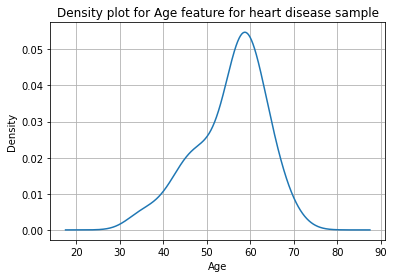

In [33]:
# plot distribution age feature for sample with num = 1 ( with heart disease)
heart_disease_sample[ 'Age' ].plot.density(grid=True)
plt.title( 'Density plot for Age feature for heart disease sample' )
plt.xlabel( 'Age' )
plt.show()

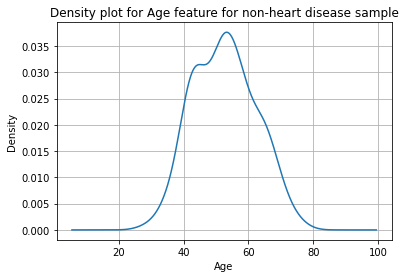

In [34]:
# plot distribution age feature for sample with  num = 0  ( without heart disease)
non_heart_disease_sample[ 'Age' ].plot.density(grid=True)
plt.title( 'Density plot for Age feature for non-heart disease sample' )
plt.xlabel( 'Age' )
plt.show()

We cannot perform the t-test as the heart disease sample in not normally distributed. However, we can combat this problem by choosing another test that does not require the sample to be normally distributed.


In [35]:
# Using Mann-Whitney rank test 
mannwhitneyu_results = stats.mannwhitneyu( heart_disease_sample[ 'Age' ], non_heart_disease_sample[ 'Age' ], alternative = 'two-sided' )
print( mannwhitneyu_results )

MannwhitneyuResult(statistic=5443.0, pvalue=0.02175078707913069)


We reject the null hypothesis as p-value<0.05 and conclude that the alternative hypothesis is true, i.e $H_{1}:\mu_{age\ of\  heart\ disease\ patients}\neq \mu_{age\ of\ normal\ patients}$


**Thus, there is significant difference in the age of patients who have heart disease and those who do not.**

**2. Identify if women are significantly more likely to get heart disease than men?**

In [39]:
# plotting the features `Sex` and `num`
male_dataframe = cleveland_dataset[ cleveland_dataset[ 'Sex' ] == 0 ]
female_dataframe = cleveland_dataset[ cleveland_dataset[ 'Sex' ] == 1 ]
print( male_dataframe[ 'num' ].head(5) )
print( female_dataframe[ 'num' ].head(5) )
## TODO
## Work in Progress

4     0
6     3
7     0
11    0
18    0
Name: num, dtype: int64
0    0
1    2
2    1
3    0
5    0
Name: num, dtype: int64


**3. Inform yourself about χ²−test. And using χ²−test, identify if there is a
significant association between exercise induced angina (exang), and the
slope of the peak exercise ST segment (slope)?**

In [37]:
# creating matrix between features - 'exang' and 'slope'
feature_matrix = pd.crosstab(cleveland_dataset[ 'exang' ], cleveland_dataset[ 'slope' ] )

In [38]:
chi2_results = stats.chi2_contingency( feature_matrix )
print( 'Chi-square value: ', chi2_results[0] )
print( 'p-value: ', chi2_results[1] )
print( 'degree of freedom: ', chi2_results[2] )
print( 'expected values: ', chi2_results[3] )

Chi-square value:  25.131165603245137
p-value:  3.490090811425977e-06
degree of freedom:  2
expected values:  [[95.6039604  94.25742574 14.13861386]
 [46.3960396  45.74257426  6.86138614]]


The p-value is less than 0.05, therefore null hypothesis is rejected. The 'exang' and 'slope' are dependant and there is significant association between the two features.